#  **Project Title: New York State Hospital Inpatient Discharge**
### **Batch details: July’22 Online Batch**
### **Group Number: 6**
### **Mentor: Vidhya K**
### **Team Members:**
-  Aditya Aryan
-  Mahima Bhardwaj
-  Morvi Kohad
-  Shailja Barsaiyan
-  Shrika Garg

**Case Study Scenario:** This is the public dataset made available by the Dept of Health of New York state.

The dataset consists of 2101588 rows, 33 columns which describes healthcare records on different type of parameter.

Task is to create a machine learning model which can predict Length of the stay and Risk of Mortatlity on the basis of obsereved data.

**As five key areas where avoidable days, i.e. unnecessary additions to length of stay, can make a negative impact.**

**Clinical:** The longer an individual occupies a bed in your acute facility, the longer that person will require clinical attention from staff whose time could be better spent elsewhere. 

**Financial:** There’s also financial incentive for moving patients to a more appropriate bed.

**Strategic:** Mishandled length of stay is a strategic problem. And it’s when you start approaching it with the same vigor that you would any other problem at your hospital that you can realize extensive cost savings, revenue growth, and improved outcomes.

**Operational:** Length of stay affects a wide variety of health systems operations. The following is a list of the big ones, but rest assured there are even more than this:

- Staff unable to work top of license
- Patient intake compromised
- Cleaning and sanitization procedures delayed
- Over-extension of beds, medications, medical devices

**Experiential:** The patient experience can be severely compromised if the individual must wait in a bed for longer than is clinically necessary.

**In below case study performing the step by step approach to create a Machine Learning predictive model.**

**The flow of the case study is as below:**

* [Reading the data in python](#1)
* [Defining the problem statement](#2)
* [Identifying the Target variable](#3)
* [Looking at the distribution of Target variable](#4)
* [Basic Data exploration](#5)
* [Missing Values treatment](#6)
* [Outlier treatment](#7)
* [Visual Exploratory Data Analysis for data distribution](#8)
* [Feature Selection and Transformation based on EDA](#9)
* [Feature Encoding and Converting datatype to numeric for ML](#10)
* [Scaling, Spliting the dataset and performing Linear Regression](#11)
* [Assumptions of MLR Model](#12)
* [Model Evaluation and Performance](#13)
* [Conclusion](#14)


## **Data description**

The business meaning of each column in the data is as below:

Column Descripiton: https://health.data.ny.gov/Health/Hospital-Inpatient-Discharges-SPARCS-De-Identified/tg3i-cinn

-  **Hospital Service Area:** A description of the Health Service Area (HSA) in which the hospital is located. Capital/Adirondack, Central NY, Finger Lakes, Hudson Valley, Long Island, New York City, Southern Tier, Western NY.
-  **Hospital County:** A description of the county in which the hospital is located. 
-  **Operating Certificate Number:** The facility Operating Certificate Number as assigned by NYS Department of Health.
-  **Permanent Facility Id:** Permanent Facility Identifier.
-  **Facility Name:** The name of the facility where services were performed based on the Permanent Facility Identifier (PFI), as maintained by the NY Division of Health Facility Planning.
-  **Age Group:** Age in years at time of discharge. Grouped into the following age groups: 0 to 17, 18 to 29, 30 to 49, 50 to 69, and 70 or Older.
-  **Zip Code - 3 digits:** The first three digits of the patient's zip code.
-  **Gender:** Patient gender.
-  **Race:** Patient race.
-  **Ethnicity:** Patient ethnicity.
-  **Length of Stay:** The total number of patient days at an acute level and/or other than acute care level.
-  **Type of Admission:**  A description of the manner in which the patient was admitted to the health care facility.
-  **Patient Disposition:** The patient's destination or status upon discharge.
-  **Discharge Year:** The year of discharge.
-  **CCSR Diagnosis Code:** AHRQ Clinical Classification Software Refined (CCSR) Diagnosis  Category Code.
-  **CCSR Diagnosis Description:**  AHRQ Clinical Classification Software Refined (CCSR) Diagnosis  Category Description.
-  **CCSR Procedure Code:** AHRQ Clinical Classification Software Refined (CCSR) ICD-10 Procedure Category Code.
-  **CCSR Procedure Description:** AHRQ Clinical Classification Software Refined (CCSR) ICD-10 Procedure Category Description.
-  **APR DRG Code:** The All Patients Refined Diagnosis Related Groups (APR-DRG) Classification Code.
-  **APR DRG Description:** The APR-DRG Classification Code Description in Calendar Year 2021.
-  **APR MDC Code:** All Patient Refined Major Diagnostic Category (APR MDC) Code. APR-DRG Codes 001-006 and 950-956 may group to more than one MDC Code.
-  **APR MDC Description:** All Patient Refined Major Diagnostic Category (APR MDC) Description.
-  **APR Severity of Illness Code:** The APR-DRG Severity of Illness Code: 0, 1, 2, 3, 4.
-  **APR Severity of Illness Description:** All Patient Refined Severity of Illness (APR SOI) Description.
-  **APR Risk of Mortality:** All Patient Refined Risk of Mortality (APR ROM) Description.
-  **APR Medical Surgical Description:** The APR-DRG specific classification of Medical, Surgical or Not Applicable.
-  **Payment Typology 1:** A description of the type of payment for this occurrence.
-  **Payment Typology 2:** A description of the type of payment for this occurrence.
-  **Payment Typology 3:** A description of the type of payment for this occurrence.
-  **Birth Weight:** The neonate(infant) birth weight in grams; rounded to nearest 100 g.
-  **Emergency Department Indicator:** The Emergency Department Indicator is set based on the submitted revenue codes. If the record contained an Emergency Department revenue code of 045X, the indicator is set to "Y", otherwise it will be “N”.
-  **Total Charges:** Total charges for the discharge.
-  **Total Costs:** Total estimated cost for the discharge.

### Importing libraries

In [1]:
# import pandas library
import pandas as pd

# import numpy library
import numpy as np

# import seaborn library
import seaborn as sns

# import matplotlib library
import matplotlib.pyplot as plt

# import stats library
from scipy import stats

# import labelEncoder
from sklearn.preprocessing import LabelEncoder

# import train test split
from sklearn.model_selection import train_test_split

import statsmodels.api as sm 

# import breuschpagan
from statsmodels.stats.api import het_breuschpagan

# import qqplot
from statsmodels.graphics.gofplots import qqplot

# import crossval
from sklearn.model_selection import cross_val_score

# import Stander Scaler
from sklearn.preprocessing import StandardScaler

# importing libraries to calculte errors of the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

# import Linear Regression model
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,SGDRegressor

# import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# # import warning library to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)


<a id=1></a>
### 1. Reading the data in python

**As our dataset contains 21Lakh+ rows, for the ease of calculation and building models we are taking subset of 6lakh rows.**

In [3]:
health_data = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021_subset.csv',low_memory=False)

<a id=2></a>
### 2. Defining the problem statement

**Create a ML model which can predict the Length of stay of the patient.**

* Target Variable: Length of Stay
* Predictors: Hospital County, Permanent Facility Id, Diagnosis code etc.

<a id=3></a>
### 3.Determining the type of Machine Learning


Based on the problem statement we can understand that we need to create a **supervised ML Regression model**, as the target variable is continuous.

<a id=4></a>
### 4. Looking at the distribution of Target variable

In [4]:
health_data['Length of Stay'].unique()

array(['4', '8', '1', '16', '2', '19', '14', '11', '13', '20', '3', '9',
       '6', '5', '12', '17', '15', '22', '34', '7', '25', '23', '21',
       '10', '24', '30', '35', '78', '18', '33', '26', '42', '41', '81',
       '31', '48', '28', '29', '38', '56', '49', '103', '27', '91', '59',
       '120 +', '53', '39', '52', '40', '46', '51', '32', '60', '45',
       '58', '44', '43', '66', '36', '50', '85', '63', '102', '68', '61',
       '84', '89', '54', '47', '37', '76', '92', '64', '71', '95', '62',
       '83', '74', '67', '111', '99', '80', '55', '75', '96', '82', '87',
       '98', '104', '77', '110', '69', '112', '97', '93', '115', '116',
       '57', '114', '72', '65', '79', '70', '86', '118', '94', '105',
       '117', '73', '109', '107', '108', '101', '106', '90', '119', '113',
       '100', '88'], dtype=object)

**Inference: Length of stay column, which is currently an object. Will convert it to 'int' to allow for the possibility of regression analysis, some entries are written as '120 +', converting it into 120.**

In [5]:
# Converting '120+' to '120' and converting datatype to number 
health_data['Length of Stay'] = health_data['Length of Stay'].replace('120 +','120')
health_data['Length of Stay'] = health_data['Length of Stay'].astype(int)

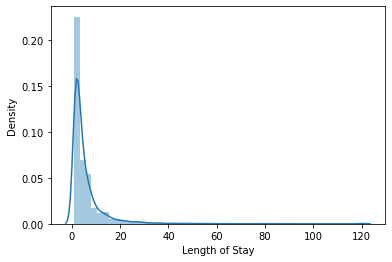

In [6]:
# Creating Bar chart as the Target variable is Continuous
sns.distplot(health_data['Length of Stay'][0:20000])
plt.show()

In [7]:
health_data['Length of Stay'].skew()

5.823313893533984

**Inference: Data distribution of the target variable is positivley skewed and acceptable to proceed for further steps.**

<a id=5></a>
### 5. Basic Data Exploration

In [8]:
# Looking at sample rows in the data
health_data.head(3)

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Manhattan,7002054.0,1458.0,New York-Presbyterian Hospital - New York Weil...,30 to 49,111,F,Other Race,Not Span/Hispanic,4,Emergency,Home or Self Care,2021,PRG019,DIABETES OR ABNORMAL GLUCOSE TOLERANCE COMPLIC...,PGN003,CESAREAN SECTION,540,CESAREAN SECTION WITHOUT STERILIZATION,14,"PREGNANCY, CHILDBIRTH AND THE PUERPERIUM",2,Moderate,Major,Surgical,Medicaid,NaN,NaN,NaN,Y,72765.04,17081.61
1,New York City,Manhattan,7002012.0,1447.0,Hospital for Special Surgery,50 to 69,OOS,F,White,Not Span/Hispanic,4,Elective,Home w/ Home Health Services,2021,MUS006,OSTEOARTHRITIS,MST006,KNEE ARTHROPLASTY,326,ELECTIVE KNEE JOINT REPLACEMENT,8,DISEASES AND DISORDERS OF THE MUSCULOSKELETAL ...,3,Major,Minor,Surgical,Private Health Insurance,NaN,NaN,NaN,N,131195.01,50178.76
2,New York City,Manhattan,7002054.0,1458.0,New York-Presbyterian Hospital - New York Weil...,50 to 69,114,F,Other Race,Spanish/Hispanic,8,Emergency,Home w/ Home Health Services,2021,CIR019,HEART FAILURE,MAM005,MEASUREMENT DURING CARDIAC CATHETERIZATION,192,CARDIAC CATHETERIZATION FOR OTHER NON-CORONARY...,5,DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM,3,Major,Major,Medical,Medicare,NaN,NaN,NaN,Y,192353.77,83878.65


In [9]:
# Looking the shape of the data
health_data.shape

(630476, 33)

In [10]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630476 entries, 0 to 630475
Data columns (total 33 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Hospital Service Area                627234 non-null  object 
 1   Hospital County                      627234 non-null  object 
 2   Operating Certificate Number         626815 non-null  float64
 3   Permanent Facility Id                627234 non-null  float64
 4   Facility Name                        630476 non-null  object 
 5   Age Group                            630476 non-null  object 
 6   Zip Code - 3 digits                  617041 non-null  object 
 7   Gender                               630476 non-null  object 
 8   Race                                 630476 non-null  object 
 9   Ethnicity                            630476 non-null  object 
 10  Length of Stay                       630476 non-null  int32  
 11  Type of Admis

**Inference: In total we have 4 float features, 1 int feature and 24 object features**

In [11]:
# Looking at the descriptive statistics of the numerical features
health_data.describe()

,Operating Certificate Number,Permanent Facility Id,Length of Stay,Discharge Year,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Total Charges,Total Costs
count,6.268150e+05,627234.000000,630476.000000,630476.0,630476.000000,630476.000000,630476.000000,6.304760e+05,6.304760e+05
mean,4.990337e+06,1033.932784,5.733671,2021.0,414.132822,10.283257,2.121933,7.321986e+04,2.199711e+04
std,2.235348e+06,708.931744,8.379887,0.0,244.162062,5.958565,0.955602,1.504288e+05,4.884884e+04
min,1.010000e+05,1.000000,1.000000,2021.0,1.000000,0.000000,0.000000,5.000000e-01,2.200000e-01
25%,2.951001e+06,528.000000,2.000000,2021.0,194.000000,5.000000,1.000000,1.913957e+04,6.039830e+03
50%,5.902001e+06,1045.000000,3.000000,2021.0,383.000000,9.000000,2.000000,3.838807e+04,1.158370e+04
75%,7.002020e+06,1453.000000,6.000000,2021.0,640.000000,15.000000,3.000000,7.720314e+04,2.302884e+04
max,7.004010e+06,10355.000000,120.000000,2021.0,956.000000,25.000000,4.000000,1.705480e+07,1.231128e+07


**Inference: From the above result we can see that Total charges and Total Costs feature consists positive outliers.**

In [12]:
# Looking at the descriptive statistics of the categorical features
health_data.describe(include='object')

,Hospital Service Area,Hospital County,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator
count,627234,627234,630476,630476,617041,630476,630476,630476,630476,630476,630005,630005,458211,458211,630476,630476,629732,629732,630476,630476,307990,99929,62270,630476
unique,8,57,203,5,50,3,4,4,6,19,470,470,319,319,334,26,4,4,3,9,9,9,60,2
top,New York City,Manhattan,Mount Sinai Hospital,70 or Older,112,F,White,Not Span/Hispanic,Emergency,Home or Self Care,PNL001,LIVEBORN,PGN002,SPONTANEOUS VAGINAL DELIVERY,"NEONATE BIRTH WEIGHT > 2499 GRAMS, NORMAL NEWB...",DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM,Moderate,Minor,Medical,Medicare,Medicaid,Self-Pay,03300,Y
freq,281393,109672,15081,185364,76357,343483,342817,472575,414969,412590,59930,59930,34032,34032,51792,77677,228461,320922,481434,246859,124993,61672,5124,394543


**Inference: In our dataset we have more number of object type variable which will be handled through encoding.**

**Finding duplicated rows**

In [13]:
health_data.duplicated().sum()

757

In [14]:
# Dropping duplicated records
health_data = health_data[~health_data.duplicated()]
health_data.shape

(629719, 33)

**Inference: In total we have 757 duplicated rows in our dataset, removing it for no redundancy.**

**Unique values of each feature**

In [15]:
for i in health_data.columns:
    print(f'{i} :\n {health_data[i].unique()}\n ')

Hospital Service Area :
 ['New York City' 'Long Island' 'Hudson Valley' 'Central NY' 'Western NY'
 'Capital/Adirond' 'Finger Lakes' nan 'Southern Tier']
 
Hospital County :
 ['Manhattan' 'Suffolk' 'Rockland' 'Westchester' 'Richmond' 'Putnam'
 'Onondaga' 'Niagara' 'Bronx' 'Erie' 'St Lawrence' 'Nassau' 'Warren'
 'Rensselaer' 'Cortland' 'Queens' 'Cayuga' 'Clinton' 'Orange' 'Kings'
 'Saratoga' 'Albany' 'Chemung' 'Monroe' 'Oneida' nan 'Broome' 'Steuben'
 'Otsego' 'Tompkins' 'Madison' 'Oswego' 'Dutchess' 'Wayne' 'Chautauqua'
 'Cattaraugus' 'Schenectady' 'Ontario' 'Montgomery' 'Livingston' 'Essex'
 'Jefferson' 'Chenango' 'Columbia' 'Sullivan' 'Wyoming' 'Ulster' 'Fulton'
 'Delaware' 'Franklin' 'Allegany' 'Genesee' 'Herkimer' 'Schoharie' 'Lewis'
 'Yates' 'Orleans' 'Schuyler']
 
Operating Certificate Number :
 [7002054. 7002012. 5151001. 7002053. 7002017. 4329000. 5957001. 7004010.
 7002002. 3950000. 3301008. 3121001. 7000008. 1401014. 4401000. 5154001.
 2953000. 1401013. 5153000. 3301007. 70030

Zip Code - 3 digits :
 ['111' 'OOS' '114' '117' '101' '100' '109' '105' '103' '131' '140' '104'
 '142' '136' '113' '141' '130' '115' '128' '121' '132' '129' '127' '112'
 '107' '120' nan '148' '118' '108' '122' '147' '146' '125' '135' '139'
 '133' '149' '119' '144' '106' '126' '138' '145' '134' '110' '137' '123'
 '124' '143' '116']
 
Gender :
 ['F' 'M' 'U']
 
Race :
 ['Other Race' 'White' 'Multi-racial' 'Black/African American']
 
Ethnicity :
 ['Not Span/Hispanic' 'Spanish/Hispanic' 'Unknown' 'Multi-ethnic']
 
Length of Stay :
 [  4   8   1  16   2  19  14  11  13  20   3   9   6   5  12  17  15  22
  34   7  25  23  21  10  24  30  35  78  18  33  26  42  41  81  31  48
  28  29  38  56  49 103  27  91  59 120  53  39  52  40  46  51  32  60
  45  58  44  43  66  36  50  85  63 102  68  61  84  89  54  47  37  76
  92  64  71  95  62  83  74  67 111  99  80  55  75  96  82  87  98 104
  77 110  69 112  97  93 115 116  57 114  72  65  79  70  86 118  94 105
 117  73 109 107 108 101 106 

CCSR Procedure Description :
 ['CESAREAN SECTION' 'KNEE ARTHROPLASTY'
 'MEASUREMENT DURING CARDIAC CATHETERIZATION' nan
 'VENOUS AND ARTERIAL CATHETER PLACEMENT'
 'INCISION AND DRAINAGE OF SUBCUTANEOUS TISSUE AND FASCIA'
 'PACEMAKER AND DEFIBRILLATOR PROCEDURES'
 'PHARMACOTHERAPY FOR MENTAL HEALTH (EXCLUDING SUBSTANCE USE)'
 'MECHANICAL VENTILATION' 'ADMINISTRATION OF ANTIBIOTICS' 'HEMODIALYSIS'
 'ADMINISTRATION OF NUTRITIONAL AND ELECTROLYTIC SUBSTANCES'
 'MENTAL HEALTH PROCEDURES, NEC' 'VACCINATIONS'
 'HEART CONDUCTION MECHANISM PROCEDURES' 'PARACENTESIS' 'CIRCUMCISION'
 'SPONTANEOUS VAGINAL DELIVERY'
 'CHEST TUBE PLACEMENT AND THERAPEUTIC THORACENTESIS'
 'CYSTECTOMY (INCLUDING FULGURATION) AND URETHRECTOMY'
 'POTENTIAL COVID-19 THERAPIES' 'GI SYSTEM REPAIR (EXCLUDING ANORECTAL)'
 'HEART VALVE REPLACEMENT AND OTHER VALVE PROCEDURES (NON-ENDOVASCULAR)'
 'CHOLECYSTECTOMY' 'TOE AND MID FOOT AMPUTATION' 'GASTRECTOMY'
 'ESOPHAGOGASTRODUODENOSCOPY (EGD) WITH BIOPSY' 'SPINE FUSION'
 'BILIAR

APR Severity of Illness Code :
 [2 3 1 4 0]
 
APR Severity of Illness Description :
 ['Moderate' 'Major' 'Minor' 'Extreme' nan]
 
APR Risk of Mortality :
 ['Major' 'Minor' 'Moderate' 'Extreme' nan]
 
APR Medical Surgical Description :
 ['Surgical' 'Medical' 'Not Applicable']
 
Payment Typology 1 :
 ['Medicaid' 'Private Health Insurance' 'Medicare' 'Blue Cross/Blue Shield'
 'Managed Care, Unspecified' 'Federal/State/Local/VA' 'Self-Pay'
 'Miscellaneous/Other' 'Department of Corrections']
 
Payment Typology 2 :
 [nan 'Blue Cross/Blue Shield' 'Medicaid' 'Private Health Insurance'
 'Self-Pay' 'Medicare' 'Miscellaneous/Other' 'Federal/State/Local/VA'
 'Managed Care, Unspecified' 'Department of Corrections']
 
Payment Typology 3 :
 [nan 'Self-Pay' 'Private Health Insurance' 'Medicaid'
 'Blue Cross/Blue Shield' 'Miscellaneous/Other'
 'Managed Care, Unspecified' 'Medicare' 'Federal/State/Local/VA'
 'Department of Corrections']
 
Birth Weight :
 [nan '03100' '03200' '03000' '03300' '04000' '039

<a id=6></a>
### 6. Missing Values treatment

In [16]:
(health_data.isnull().mean()*100).sort_values(ascending=False)


Birth Weight                           90.187052
Payment Typology 3                     84.163254
Payment Typology 2                     51.140906
CCSR Procedure Code                    27.293285
CCSR Procedure Description             27.293285
Zip Code - 3 digits                     2.133174
Operating Certificate Number            0.581053
Hospital County                         0.514515
Hospital Service Area                   0.514515
Permanent Facility Id                   0.514515
APR Risk of Mortality                   0.117989
APR Severity of Illness Description     0.117989
CCSR Diagnosis Code                     0.074795
CCSR Diagnosis Description              0.074795
Ethnicity                               0.000000
APR Severity of Illness Code            0.000000
Total Charges                           0.000000
Emergency Department Indicator          0.000000
Facility Name                           0.000000
Age Group                               0.000000
Payment Typology 1  

**Treatment of Null values**

**Dropping 'Birth Weight','Payment Typology 2', 'Payment Typology 3' columns as it contains more than 50% null values and it will be difficult to extract value from them.**

In [17]:
# Dropping mentioned columns
health_data.drop(columns=['Birth Weight','Payment Typology 2', 'Payment Typology 3'],axis =1,inplace=True)


**Imputing NaN values of `CCSR Procedure code` corresponding to the mode of its grouped by `CCSR Diagnosis Code`.**

In [18]:
# 
temp_table_procedure_code = health_data.groupby('CCSR Diagnosis Code')['CCSR Procedure Code'].value_counts().to_frame()
temp_table_procedure_code =temp_table_procedure_code.rename(columns={'CCSR Procedure Code':'count'}).reset_index()
procedure_code_dict = temp_table_procedure_code.sort_values('count').groupby('CCSR Diagnosis Code').last().to_dict()
procedure_code_dict = procedure_code_dict.get('CCSR Procedure Code')


In [19]:
health_data['CCSR Procedure Code'] = health_data['CCSR Procedure Code'].fillna(health_data['CCSR Diagnosis Code'].apply(lambda x: procedure_code_dict.get(x)))


**Imputing the value of `CCSR Procedure Description` corresponding to its `CCSR Procedure Code`.**

In [20]:

temp_table_procedure_des = health_data.groupby('CCSR Procedure Code')['CCSR Procedure Description'].value_counts().to_frame()
temp_table_procedure_des =temp_table_procedure_des.rename(columns={'CCSR Procedure Description':'count'}).reset_index()
procedure_des_dict = temp_table_procedure_des.sort_values('count').groupby('CCSR Procedure Code').last().to_dict()
procedure_des_dict = procedure_des_dict.get('CCSR Procedure Description')


In [21]:
health_data['CCSR Procedure Description'] = health_data['CCSR Procedure Description'].fillna(health_data['CCSR Procedure Code'].map(procedure_des_dict))

In [22]:
health_data[['CCSR Procedure Code','CCSR Procedure Description']].isnull().sum()

CCSR Procedure Code           262
CCSR Procedure Description    262
dtype: int64

**Dropping rows from `['Zip Code - 3 digits','Hospital County','Hospital Service Area','Permanent Facility Id','APR Risk of Mortality','APR Severity of Illness Description','CCSR Diagnosis Code','CCSR Diagnosis Description']` columns which contains NaN values, as it is relatively small number of NaN values and thus will be insignificant to drop.**

**We can drop remaining NaN values from `CCSR Procedure Code` and `CCSR Procedure Description` column.**

In [23]:
health_data.dropna(axis=0,inplace=True)
health_data.isnull().sum()

Hospital Service Area                  0
Hospital County                        0
Operating Certificate Number           0
Permanent Facility Id                  0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCSR Diagnosis Code                    0
CCSR Diagnosis Description             0
CCSR Procedure Code                    0
CCSR Procedure Description             0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mort

**Dropping Discharge Year Column as the dataset is for one year i.e., 2021 and Operating Certificate Number as it didn't signifies any importance in prediction length of stay.**

In [24]:
health_data.drop(['Operating Certificate Number','Discharge Year'], axis=1,inplace=True)  

**On inspection, 17731 rows in the zip code column had the string 'OOS' instead of a number which seems to be large quantity to simply drop these rows.Thus, will keep these rows and signify them with '999'.**

In [25]:
health_data[health_data['Zip Code - 3 digits'] == 'OOS'].count()[0]

17731

In [26]:
health_data['Zip Code - 3 digits'] = health_data['Zip Code - 3 digits'].apply(lambda x: str(x).replace('OOS','999'))  
health_data['Zip Code - 3 digits'] = health_data['Zip Code - 3 digits'].astype(np.number)


**On inspection found below points:**

**1. 6 rows in the `Gender` column is 'Unknown' imputing it with more repeated value of gender i.e., 'Female'.**

**2. `Type of Admission` of type 'Not Available' has 342 values i.e. 0.06%,imputing it with more repeated value of Type of Admission i.e., 'Emergency'.**

**3. Converting 'Unknown' value of `Ethincity` (as it is 9.17% in the column) based on the `Race` feature as 'Other Race'.**

In [27]:
health_data.Gender.value_counts()

F    334598
M    280566
U         6
Name: Gender, dtype: int64

In [28]:
health_data['Type of Admission'].value_counts()

Emergency        405694
Elective         102565
Newborn           58116
Urgent            46193
Trauma             2260
Not Available       342
Name: Type of Admission, dtype: int64

In [29]:
health_data.Gender= health_data['Gender'].str.replace('U','F')

In [30]:
health_data['Type of Admission'] = health_data['Type of Admission'].str.replace('Not Available','Emergency')

In [31]:
round(health_data.Ethnicity.value_counts()/len(health_data)*100,2)

Not Span/Hispanic    75.38
Spanish/Hispanic     15.25
Unknown               9.17
Multi-ethnic          0.20
Name: Ethnicity, dtype: float64

In [32]:
health_data[health_data.Ethnicity=='Unknown'].Race.value_counts()

Other Race                30341
White                     14177
Black/African American    11061
Multi-racial                810
Name: Race, dtype: int64

In [33]:
health_data[health_data.Race=='Other Race'].Ethnicity.value_counts()

Spanish/Hispanic     69011
Not Span/Hispanic    60428
Unknown              30341
Multi-ethnic           336
Name: Ethnicity, dtype: int64

In [34]:
health_data.Ethnicity=health_data.Ethnicity.replace('Unknown','Spanish/Hispanic')
health_data.Ethnicity.value_counts()

Not Span/Hispanic    463739
Spanish/Hispanic     150178
Multi-ethnic           1253
Name: Ethnicity, dtype: int64

<a id=7></a>
### 7. Outlier treatment

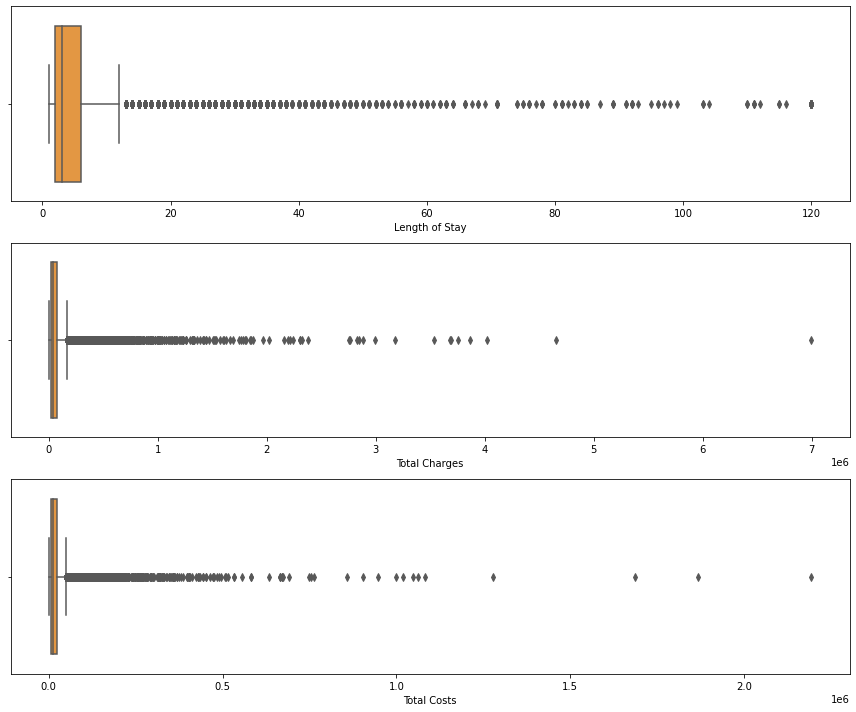

In [35]:
rows = 3
columns = 1
index=1
plt.figure(figsize=(12,10))
for i in ['Length of Stay','Total Charges','Total Costs']:
    plt.subplot(rows,columns,index)
    sns.boxplot(health_data[i][0:30000],palette="YlOrBr")
    index+=1
plt.tight_layout()
plt.show()

**Inference: From above graphs we can see that outliers in the Total Charges and Total Costs, will handle it in later steps through transformation.**

<a id=8></a>
### 8. Visual Exploratory Data Analysis for data distribution 

<h3>a. Univariate Analysis - Categorical</h3>

In [36]:
cat_cols = ['Hospital Service Area','Age Group','Gender','Race','Ethnicity','Type of Admission','Patient Disposition',
          'APR Severity of Illness Description','APR Risk of Mortality',
          'APR Medical Surgical Description','Payment Typology 1','Emergency Department Indicator']

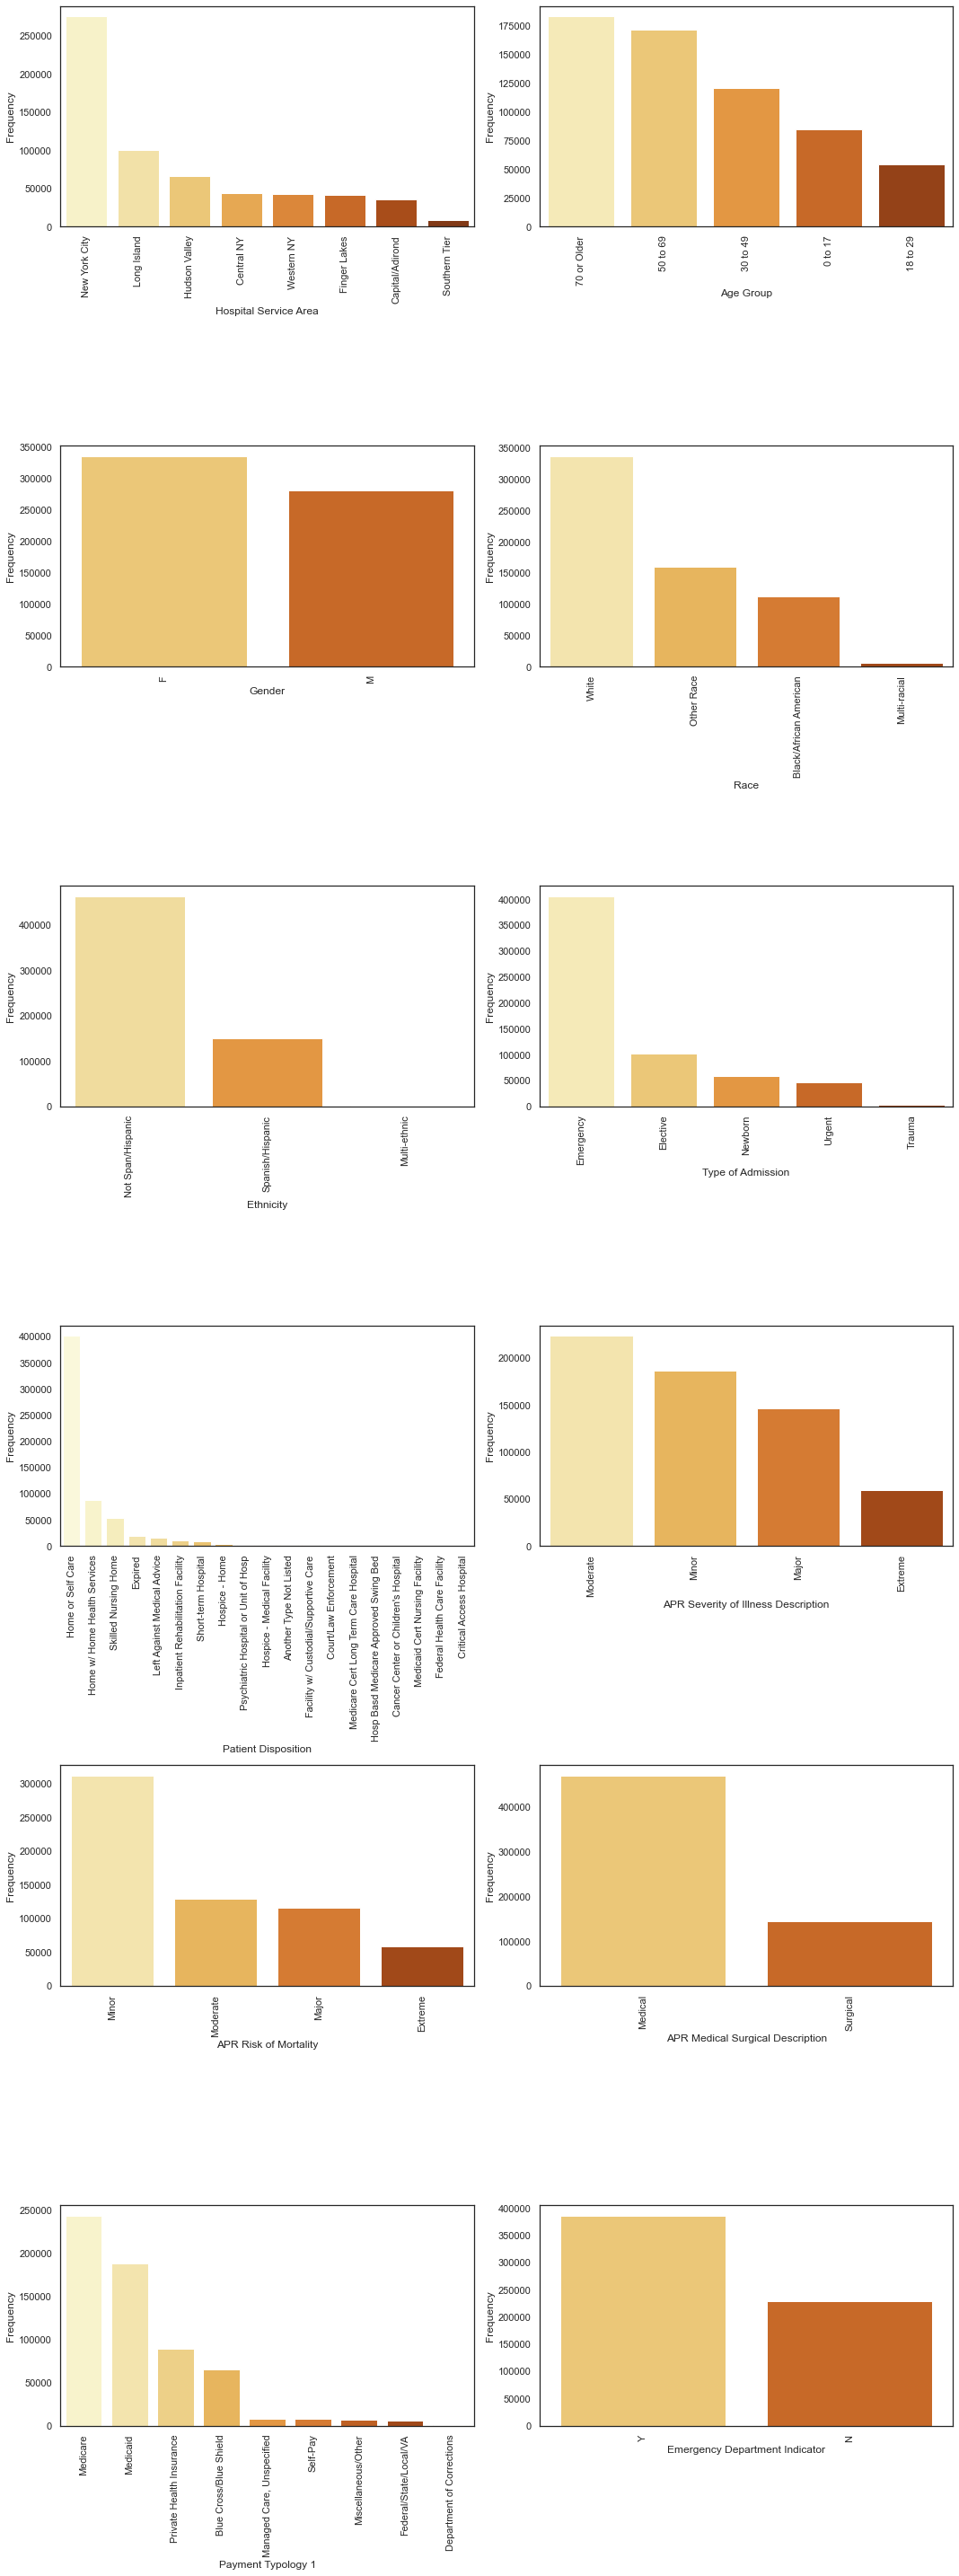

In [37]:
rows = 6
columns = 2
index = 1
plt.figure(figsize=(15,40))
sns.set(style='white')
for i in cat_cols:
    plt.subplot(rows,columns,index)
    sns.countplot(x=health_data[i],order = health_data[i].value_counts().index,palette="YlOrBr")
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    index +=1
plt.tight_layout()
plt.show()
    

**Inference:**
1. No of patients are quietly more in New York city than other cities.
2. More number of patients fall in the age category 70 years or older.
3. Female patients are more in number as comapre to male patients.
4. Patients enrolled in Emergency are huge in number.
5. Patient Disposition i.e. patients destination after discharge, mostly are in Home or Self Care prescription.
6. Mostly patients have Minor Risk of Mortality.
7. Patients have Medicare payment typology more.

<h3>b. Univariate Analysis - Numerical</h3>

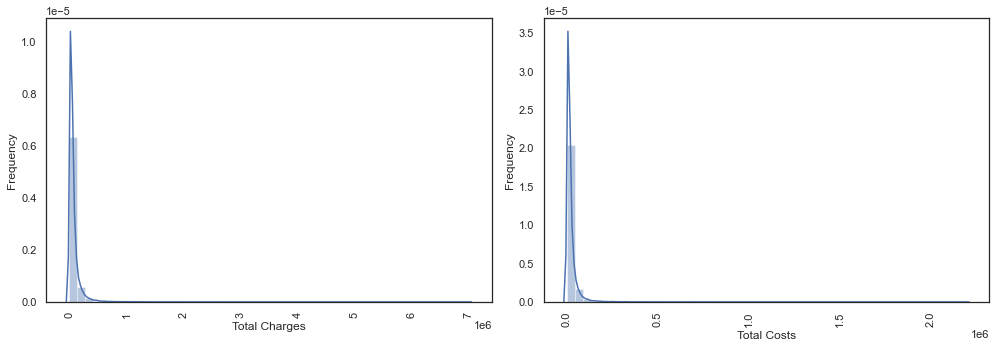

In [38]:
rows = 1
columns = 2
index = 1
plt.figure(figsize=(14,5))
# sns.set(style='darkgrid')
for i in ['Total Charges','Total Costs']:
    plt.subplot(rows,columns,index)
    sns.distplot(health_data[i][0:30000])
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    index +=1
plt.tight_layout()
plt.show()

**Inference : From above plot we can see that Total charges and Total Costs have are positively skewed. Will transform the data in later steps to reduce the impact of skewed data.**

<h3>c. Bivariate Analysis - Numerical vs Target Variable(Length of Stay)</h3>

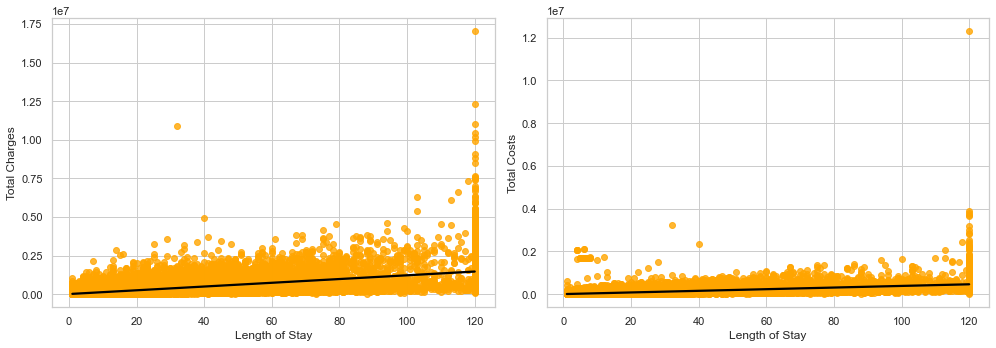

In [39]:
rows = 1
columns = 2
index = 1
plt.figure(figsize = (14,5))
sns.set_style('whitegrid')
for i in ['Total Charges','Total Costs']:
    plt.subplot(rows,columns,index)
    sns.regplot(x=health_data['Length of Stay'],y=health_data[i],data=health_data[0:30000],scatter_kws={"color": "orange"}, line_kws={"color": "black"})
    index +=1
plt.tight_layout()
plt.show()

**Inference : From above plot we can see that Total charges and Total Costs have significance positive relation.**

<h3>d. Bivariate Analysis - Numerical vs Categorical Variable(Length of Stay)</h3>

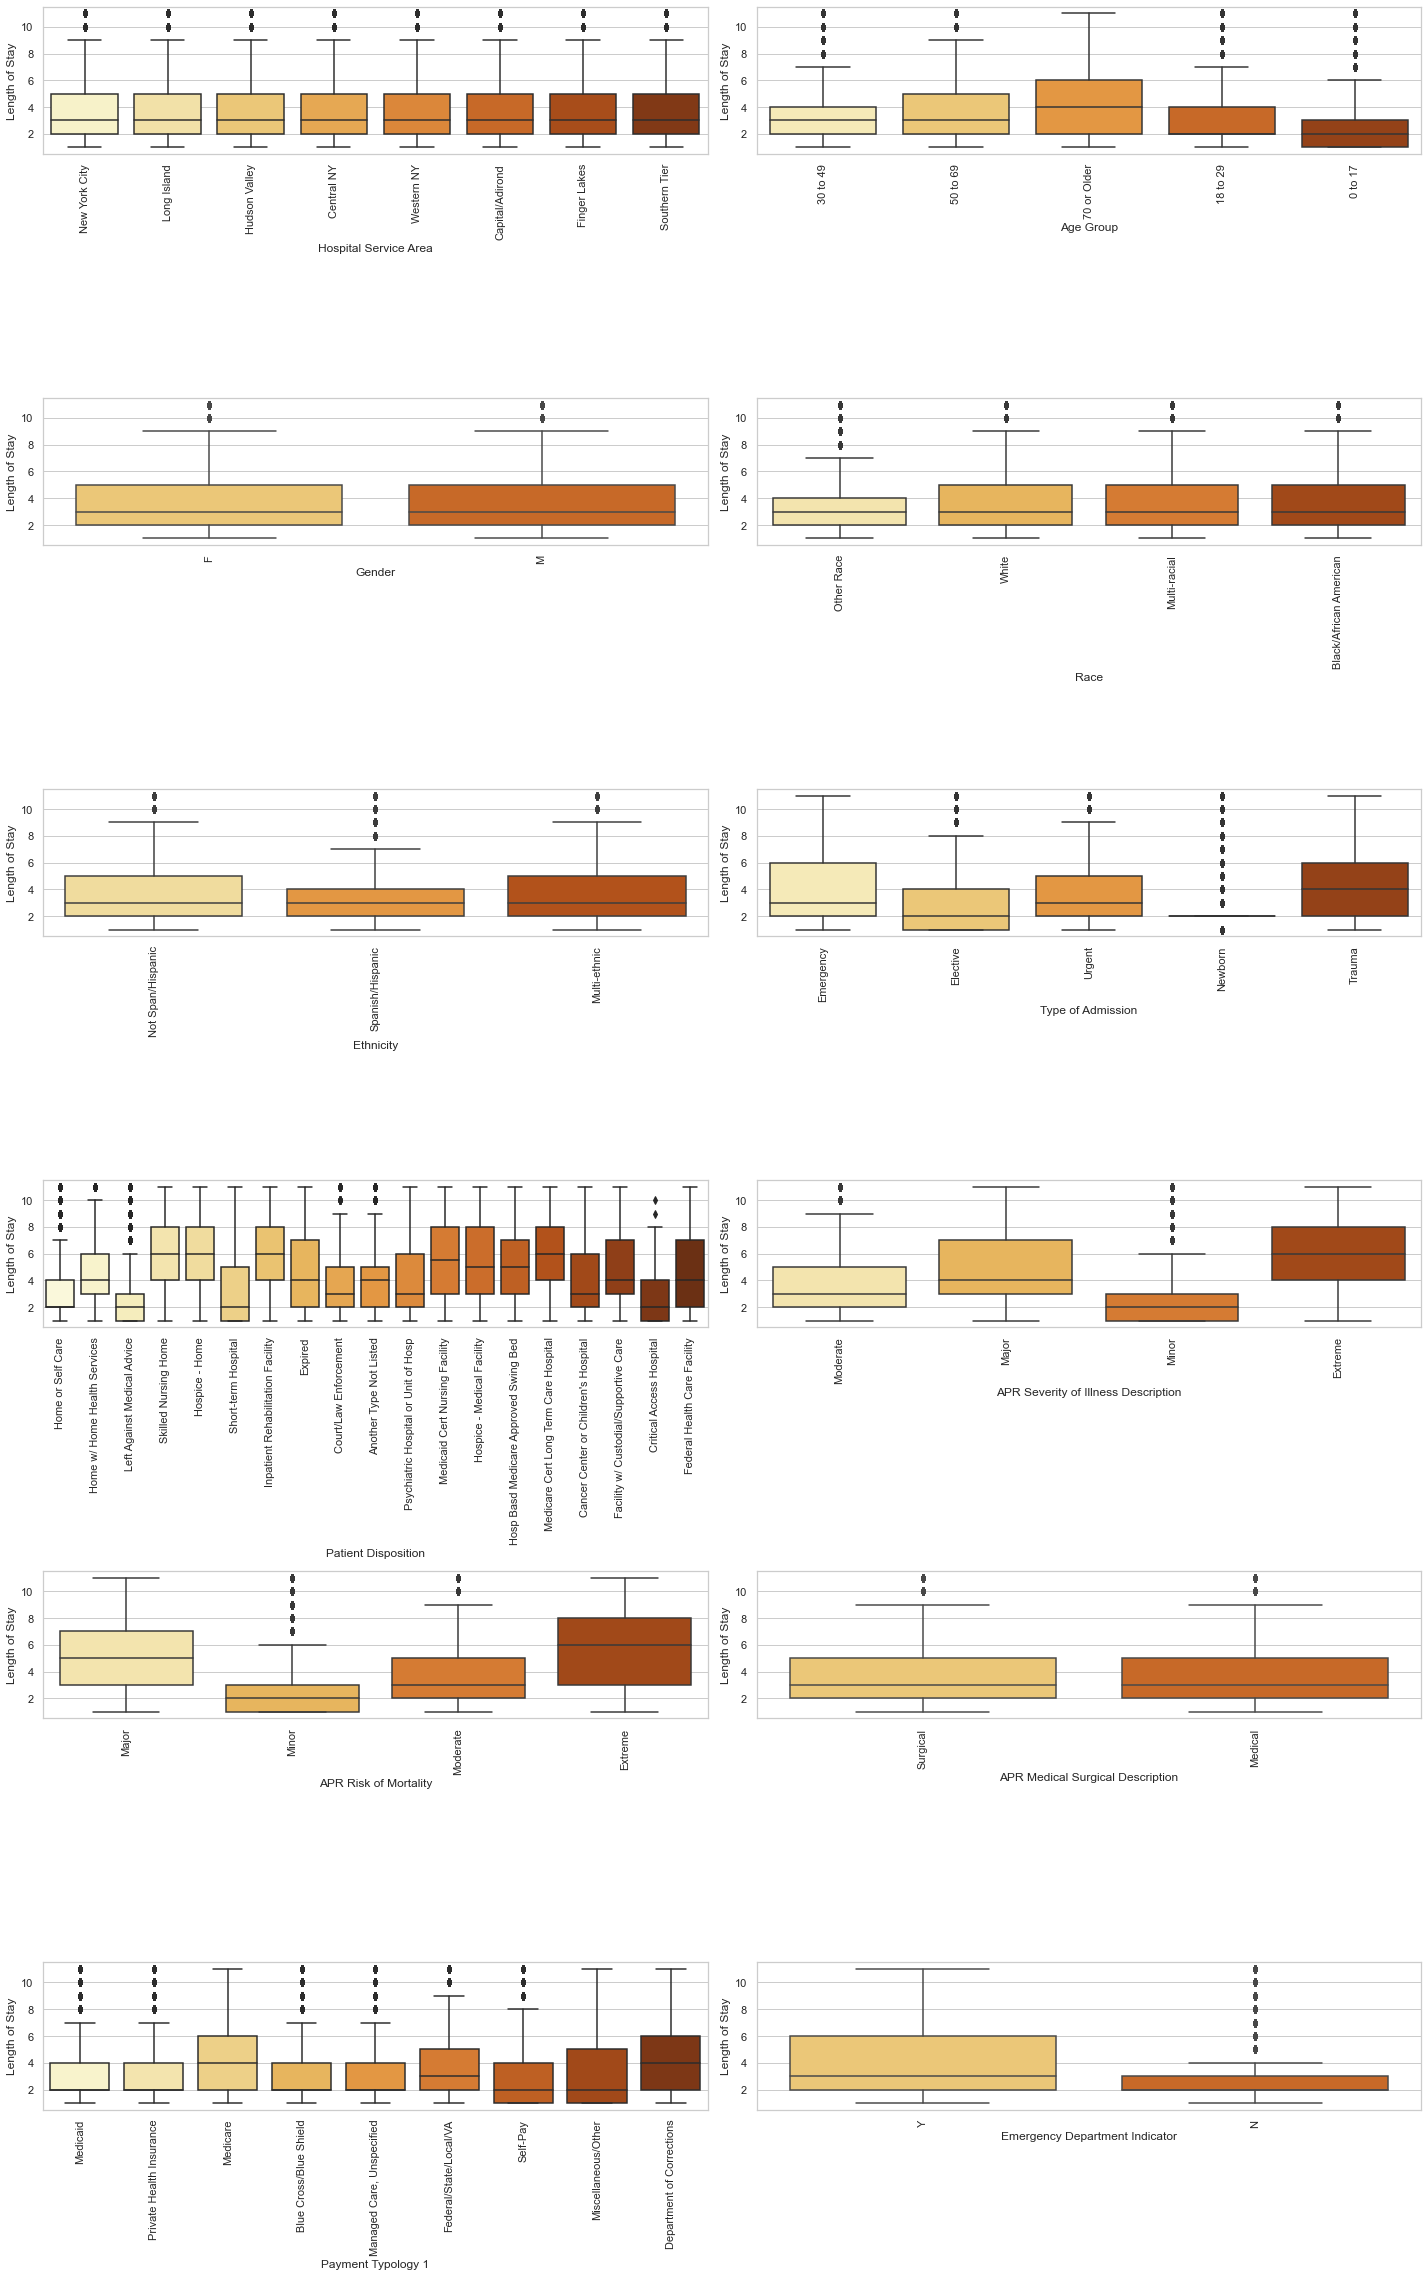

In [40]:
rows = 7
columns = 2
index = 1
plt.figure(figsize=(20,35))
for i in cat_cols:
    plt.subplot(rows,columns,index)
    q1=health_data['Length of Stay'].quantile(.25)
    q3=health_data['Length of Stay'].quantile(.75)
    iqr=q3-q1
    sns.boxplot(x=health_data[i],y=health_data['Length of Stay'][health_data['Length of Stay']<q3+1.5*iqr],palette="YlOrBr",data=health_data[0:10000])
    plt.xticks(rotation = 90)
    index +=1
plt.tight_layout()
plt.show()

**Inferences:**

**Above analysis of length of stay with our categorical variables tells us that:**
1. Children aged upto 17 years have the shortest lengths of stay.
2. Length of stay for newborns is usually 2 days.
3. Patients disposed to home care or critical access hospitals after discharge, and patients leaving against medical advice stay the shortest.
4. Patients disposed to nursing homes, rehabilitation facilities or long term care hospitals usually stay longer.
5. People with least severe ailments have lowest lengths of stay while people with extremely severe illnesses have the highest.
6. Similarly, people with a low risk of mortality have shortest stays.
7. Patients admitted in an emergency have higher lengths of stay than otherwise.

<h3>e. Multivariate Analysis </h3>

In [41]:
cols = ['Age Group','Race','Ethnicity','Type of Admission','Patient Disposition',
        'APR Risk of Mortality','APR Medical Surgical Description','Payment Typology 1']

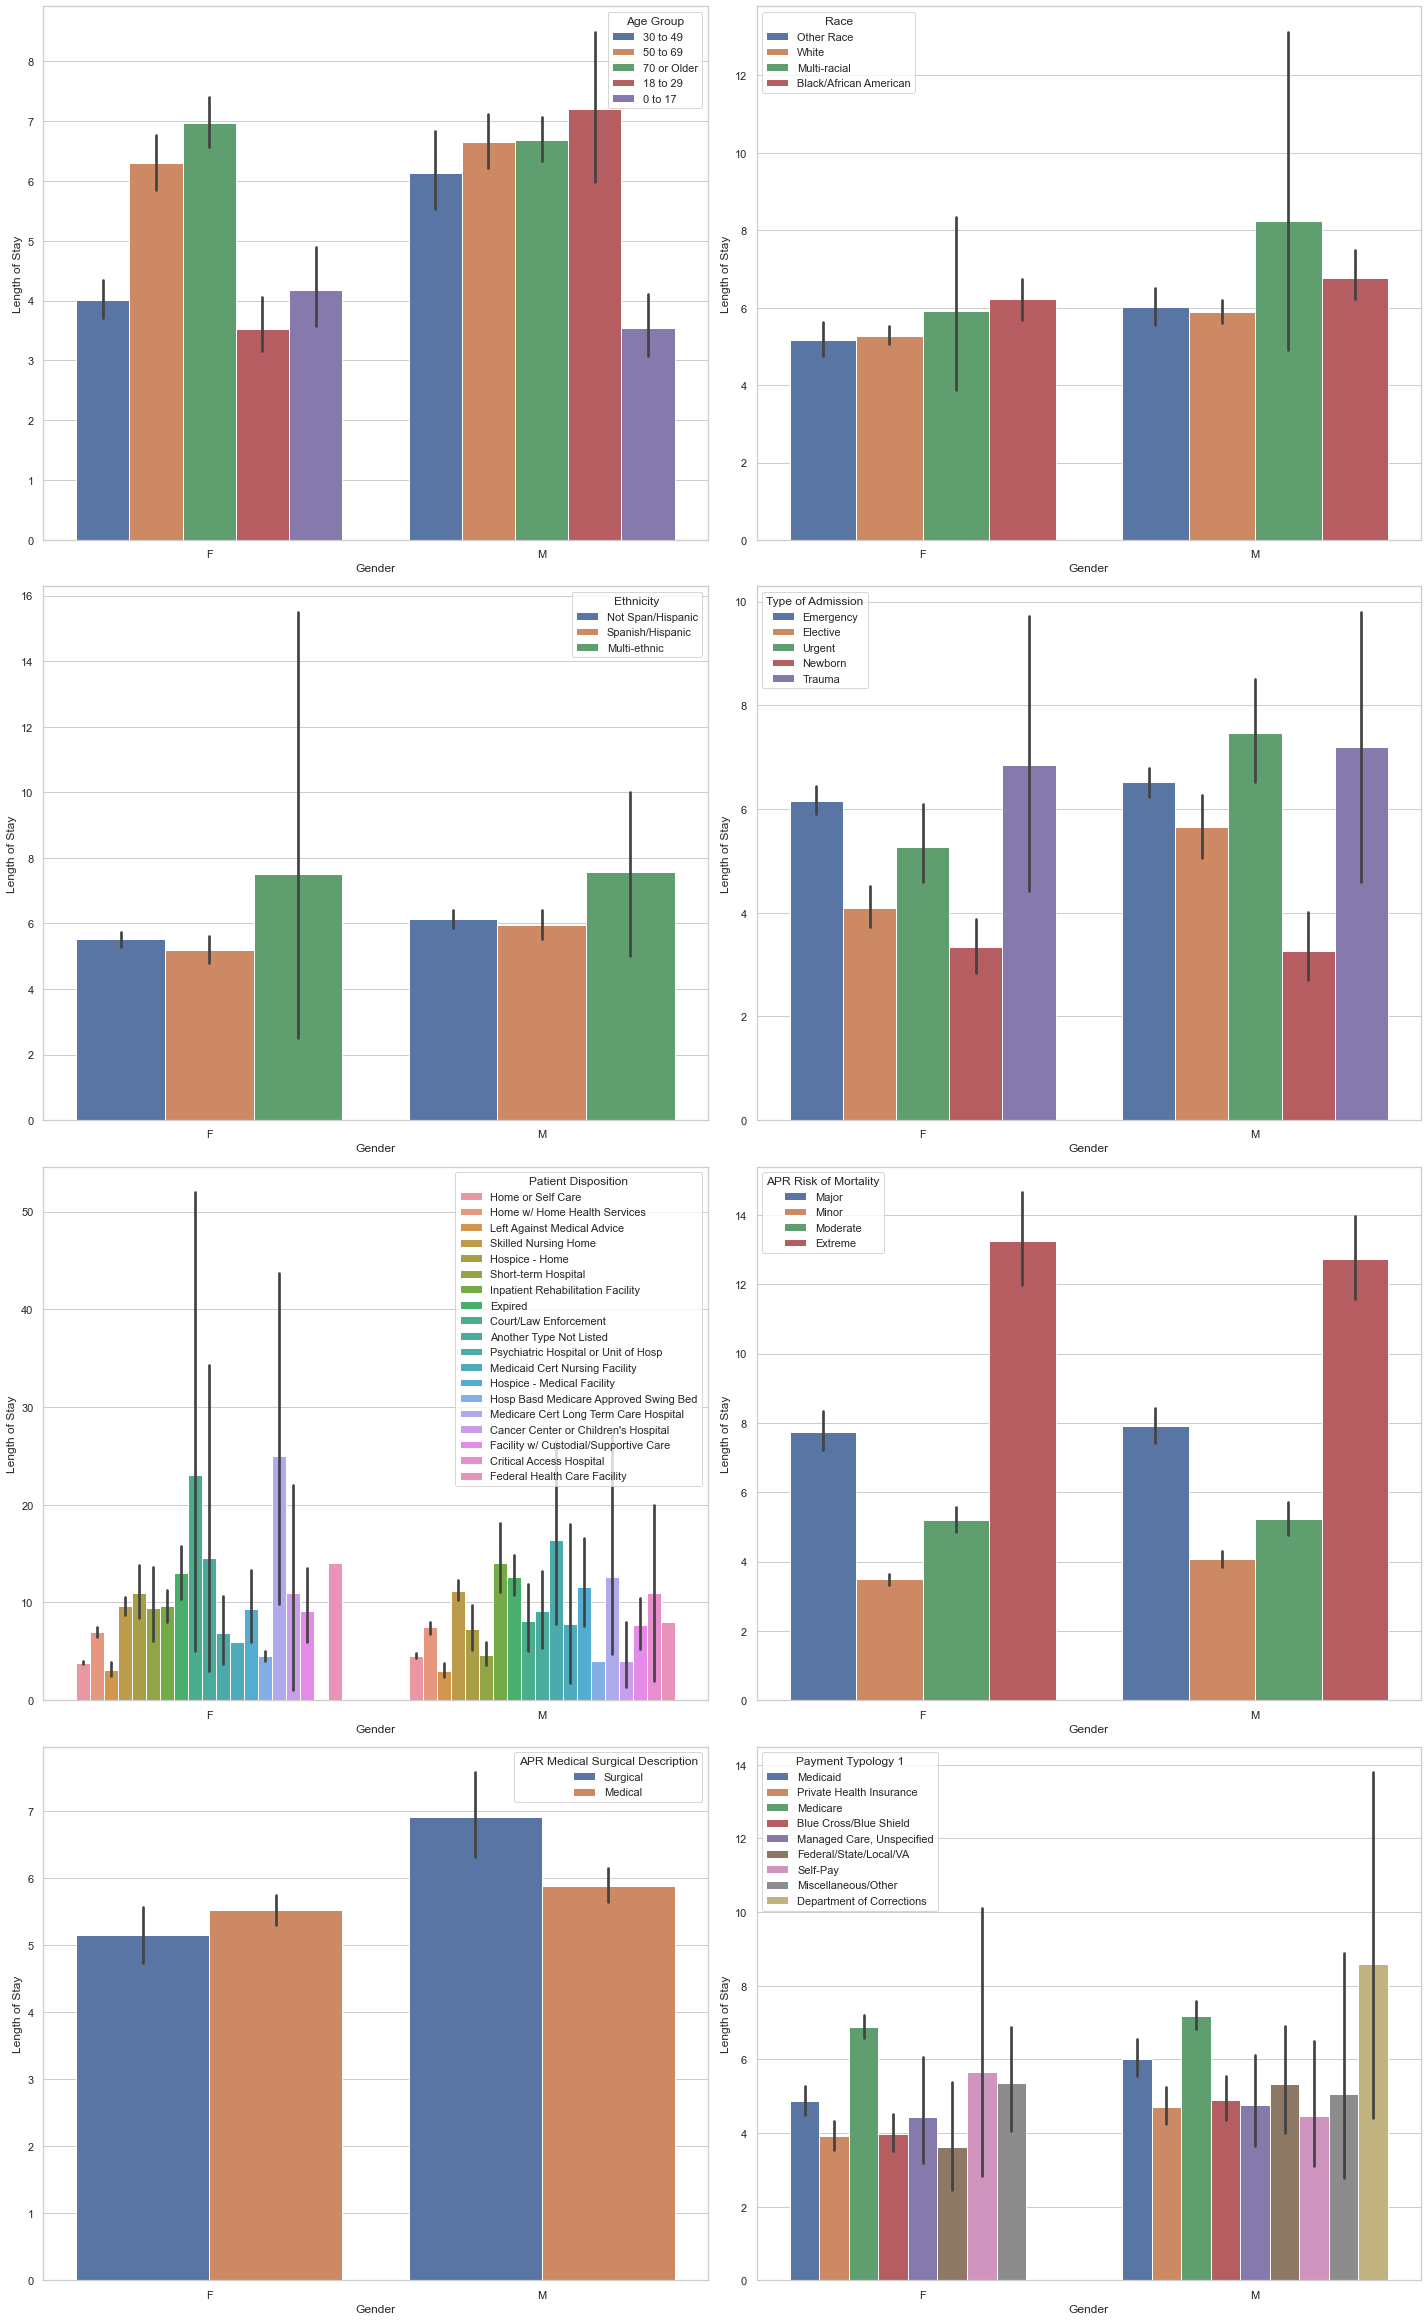

In [42]:
index =1
plt.figure(figsize=(20, 40))
sns.set_style('whitegrid')
for i in cols:
    plt.subplot(5,2,index)
    sns.barplot(x="Gender", y="Length of Stay",hue=health_data[i],data=health_data[0:10000])
    index += 1
plt.tight_layout()
# plt.ylim(0,120)
plt.show()

**Inference:**
1. Males of each group above 0 to 17 are staying more as compare to females.
2. Multi-racial and Multi-ethnic patients stays longer, not much affect of gender.
3. Patients admitted as Trauma, Emergency, and Urgent catefgory have longer stay.
4. Cancer Center or Chidren Hospital Females stayed longer than men on the same prescription.
5. Male with surgical description had longer stay than female in the same.
6. Patients who opted for Payment Typolology Medicare or Medicaid stayed longer in the hospital.

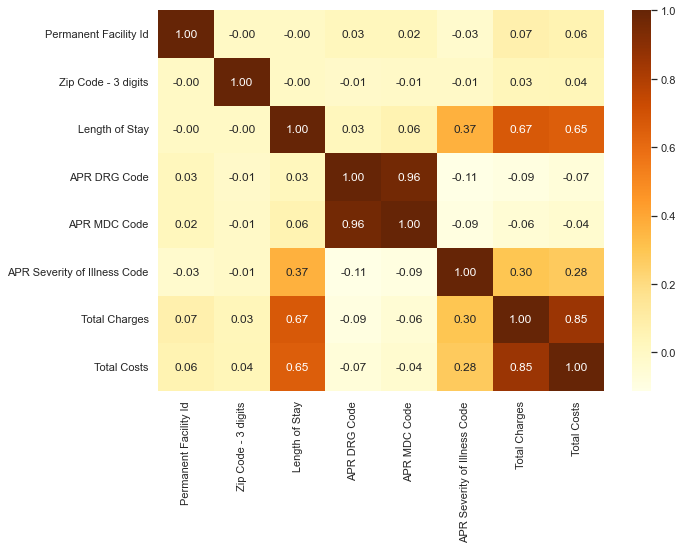

In [43]:
plt.figure(figsize=(10,7))
sns.heatmap(health_data.corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()

**Inferences:**
1. From Above plot we can see that Total Charges and Total Costs have strong positive correlation with each other and these two features are also positively correlated with Length of Stay column.
2. APR MDC code and APR DRG Code are also strongly positive correlated but they are more like a serial number.

<a id=9></a>
### 9. Feature Selection and Transformation based on EDA

**a.Transforming the `Total Charges` and `Total Costs` feature using Boxcox Pwer transformation.**

In [44]:
health_data['Total Charges']=stats.boxcox(health_data['Total Charges'])[0]
health_data['Total Costs']=stats.boxcox(health_data['Total Costs'])[0]

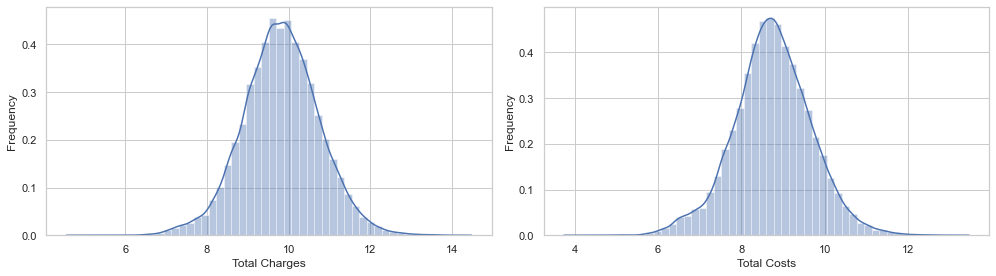

In [45]:
# Visualizing the transformed features
rows = 1
columns = 2
index = 1
plt.figure(figsize=(14,4))
# sns.set(style='darkgrid')
for i in ['Total Charges','Total Costs']:
    plt.subplot(rows,columns,index)
    sns.distplot(health_data[i][0:30000])
    plt.ylabel('Frequency')
    index +=1
plt.tight_layout()
plt.show()

**Inference : From above plot we can see that data has become normally distributed after applying transformation**

**b. Dropping redundant columns**

**On inspection, we found there are redundant columns with its code and name dropping one of them among these columns, more clear analysis has been made in the below steps:**

In [46]:
print(f"Number of Hospital County: {health_data['Hospital County'].nunique()}")
print(f"Number of Zip Code - 3 digits: {health_data['Zip Code - 3 digits'].nunique()}")

Number of Hospital County: 56
Number of Zip Code - 3 digits: 50


In [47]:
print(f"Number of Permanent Facility Id: {health_data['Permanent Facility Id'].nunique()}")
print(f"Number of Facility Name: {health_data['Facility Name'].nunique()}")

Number of Permanent Facility Id: 201
Number of Facility Name: 200


In [48]:
print(f"Number of CCSR Diagnosis Code: {health_data['CCSR Diagnosis Code'].nunique()}")
print(f"Number of CCSR Diagnosis Description: {health_data['CCSR Diagnosis Description'].nunique()}")

Number of CCSR Diagnosis Code: 455
Number of CCSR Diagnosis Description: 455


In [49]:
print(f"Number of CCSR Procedure Code: {health_data['CCSR Procedure Code'].nunique()}")
print(f"Number of CCSR Procedure Description: {health_data['CCSR Procedure Description'].nunique()}")

Number of CCSR Procedure Code: 317
Number of CCSR Procedure Description: 317


In [50]:
print(f"Number of APR DRG Code: {health_data['APR DRG Code'].nunique()}")
print(f"Number of APR DRG Description: {health_data['APR DRG Description'].nunique()}")

Number of APR DRG Code: 324
Number of APR DRG Description: 324


In [51]:
print(f"Number of APR MDC Code: {health_data['APR MDC Code'].nunique()}")
print(f"Number of APR MDC Description: {health_data['APR MDC Description'].nunique()}")

Number of APR MDC Code: 24
Number of APR MDC Description: 24


In [52]:
print(f"Number of APR Severity of Illness Code: {health_data['APR Severity of Illness Code'].nunique()}")
print(f"Number of APR Severity of Illness Description: {health_data['APR Severity of Illness Description'].nunique()}")

Number of APR Severity of Illness Code: 4
Number of APR Severity of Illness Description: 4


**Dropping Facility Name,CCSR Diagnosis Description,CCSR Procedure Description,APR DRG Description,APR MDC Description columns as they are forming redundancy.**


In [53]:
health_data.drop(['Facility Name','CCSR Diagnosis Description','CCSR Procedure Description',
                  'APR DRG Description','APR MDC Description','APR Severity of Illness Description'], axis=1,inplace=True)  

<a id=10></a>
### 10. Feature Encoding and Converting datatype to numeric for ML

**Using Target, Label Encoding, and One Hot Encoding for converting categorical columns to numerical to ease the modeling on the dataset.**

In [54]:
# Applying Target Encoding on ['Hospital Service Area','Hospital County','Type of Admission','Patient Disposition','CCSR Procedure Code'] columns
for i in ['Hospital Service Area','Hospital County','Type of Admission','Patient Disposition',
          'CCSR Procedure Code']:
    health_data[i]=health_data[i].map(dict(health_data.groupby(i)['Length of Stay'].mean()))
    
    
# Applying label encoding in Diagnosis code columns     
health_data['Age Group']=LabelEncoder().fit_transform(health_data['Age Group'])
health_data['CCSR Diagnosis Code']=LabelEncoder().fit_transform(health_data['CCSR Diagnosis Code'])


# Mapping the values of APR Risk of Mortality and Payment Typology 1 to integer values
health_data['APR Risk of Mortality']=health_data['APR Risk of Mortality'].map({'Minor':0,'Moderate':1,'Major':2,
                                                           'Extreme':3})
health_data['Payment Typology 1']=health_data['Payment Typology 1'].map(dict(health_data['Payment Typology 1']
                                                         .value_counts()/len(health_data)))

# Applying One hot encoding to the Race, Ethnicity, APR Medical Surgical, Emergency Department Indicator
health_data=pd.get_dummies(health_data,drop_first=True)
health_data.head()

,Hospital Service Area,Hospital County,Permanent Facility Id,Age Group,Zip Code - 3 digits,Length of Stay,Type of Admission,Patient Disposition,CCSR Diagnosis Code,CCSR Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Payment Typology 1,Total Charges,Total Costs,Gender_M,Race_Multi-racial,Race_Other Race,Race_White,Ethnicity_Not Span/Hispanic,Ethnicity_Spanish/Hispanic,APR Medical Surgical Description_Surgical,Emergency Department Indicator_Y
0,5.865549,5.830168,1458.0,2,111.0,4,6.277645,4.199596,404,3.373620,540,14,2,2,0.305657,10.354563,9.060844,0,0,1,0,1,0,1,1
1,5.865549,5.830168,1447.0,3,999.0,4,4.504724,7.037875,255,2.699143,326,8,3,0,0.145519,10.855693,9.983062,0,0,0,1,1,0,1,0
2,5.865549,5.830168,1458.0,3,114.0,8,6.277645,7.037875,28,4.405197,192,5,3,2,0.395962,11.178784,10.417494,0,0,1,0,0,1,0,1
3,5.285610,5.213607,245.0,4,117.0,1,6.277645,2.959659,149,7.878446,137,4,3,1,0.395962,9.228995,7.824771,1,0,0,1,1,0,0,1
4,5.865549,5.830168,1463.0,2,101.0,1,6.277645,4.199596,69,4.621517,249,6,2,0,0.106653,9.119075,8.093217,0,0,1,0,1,0,0,1


In [55]:
health_data.dtypes

Hospital Service Area                        float64
Hospital County                              float64
Permanent Facility Id                        float64
Age Group                                      int32
Zip Code - 3 digits                          float64
Length of Stay                                 int32
Type of Admission                            float64
Patient Disposition                          float64
CCSR Diagnosis Code                            int32
CCSR Procedure Code                          float64
APR DRG Code                                   int64
APR MDC Code                                   int64
APR Severity of Illness Code                   int64
APR Risk of Mortality                          int64
Payment Typology 1                           float64
Total Charges                                float64
Total Costs                                  float64
Gender_M                                       uint8
Race_Multi-racial                             

**All of the data types are in integer hence, appropriate to move forward for modeling.**

<a id=11></a>
### 11. Scaling, Spliting the dataset and performing Linear Regression

**Using Standard Scaler to perform scaling on Total Charges and Total Costs (numerical columns)** 

In [56]:
health_data_scaled=health_data.copy()
health_data_scaled['Total Charges']=StandardScaler().fit_transform(health_data_scaled['Total Charges'].values.reshape(-1,1))
health_data_scaled['Total Costs']=StandardScaler().fit_transform(health_data_scaled['Total Costs'].values.reshape(-1,1))
health_data_scaled.head()

,Hospital Service Area,Hospital County,Permanent Facility Id,Age Group,Zip Code - 3 digits,Length of Stay,Type of Admission,Patient Disposition,CCSR Diagnosis Code,CCSR Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Payment Typology 1,Total Charges,Total Costs,Gender_M,Race_Multi-racial,Race_Other Race,Race_White,Ethnicity_Not Span/Hispanic,Ethnicity_Spanish/Hispanic,APR Medical Surgical Description_Surgical,Emergency Department Indicator_Y
0,5.865549,5.830168,1458.0,2,111.0,4,6.277645,4.199596,404,3.373620,540,14,2,2,0.305657,0.581155,0.353163,0,0,1,0,1,0,1,1
1,5.865549,5.830168,1447.0,3,999.0,4,4.504724,7.037875,255,2.699143,326,8,3,0,0.145519,1.116127,1.345298,0,0,0,1,1,0,1,0
2,5.865549,5.830168,1458.0,3,114.0,8,6.277645,7.037875,28,4.405197,192,5,3,2,0.395962,1.461037,1.812666,0,0,1,0,0,1,0,1
3,5.285610,5.213607,245.0,4,117.0,1,6.277645,2.959659,149,7.878446,137,4,3,1,0.395962,-0.620426,-0.976622,1,0,0,1,1,0,0,1
4,5.865549,5.830168,1463.0,2,101.0,1,6.277645,4.199596,69,4.621517,249,6,2,0,0.106653,-0.737770,-0.687824,0,0,1,0,1,0,0,1


**Assumptions before performing Linear Regression** 
1. Target Variable should be numeric.
2.  Predictors must not show multicollinearity.


In [57]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# Features name
vif["Features"] = health_data_scaled.columns

# Calculate VIF of each features
vif["VIF_Factor"] = [variance_inflation_factor(health_data_scaled.values, i) for i in range(health_data_scaled.shape[1])]

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)
        

,Features,VIF_Factor
0,Hospital Service Area,472.494919
1,Ethnicity_Not Span/Hispanic,198.452874
2,Hospital County,195.006232
3,Type of Admission,80.963622
4,Ethnicity_Spanish/Hispanic,65.795632
5,APR MDC Code,59.291980
6,APR DRG Code,57.289748
7,APR Severity of Illness Code,17.492032
8,Age Group,9.910548
9,Payment Typology 1,8.625073


**Inference: The output shows that the variable `Hospital Service Area` has the highest VIF. Removing  this feature from the dataset and set the threshold of VIF as to 10, it means considering feature having VIF less than or equal to 10 (can be changed as per business requirement)**.

In [58]:
# Dropping Hospital Service Area
health_data_scaled.drop('Hospital Service Area',axis=1,inplace=True)

# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# Features name
vif["Features"] = health_data_scaled.columns

# Calculate VIF of each features
vif["VIF_Factor"] = [variance_inflation_factor(health_data_scaled.values, i) for i in range(health_data_scaled.shape[1])]

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,Features,VIF_Factor
0,Ethnicity_Not Span/Hispanic,120.667192
1,Hospital County,113.181061
2,Type of Admission,79.537648
3,APR MDC Code,59.291051
4,APR DRG Code,57.278531
5,Ethnicity_Spanish/Hispanic,40.780336
6,APR Severity of Illness Code,17.450107
7,Age Group,9.908058
8,Payment Typology 1,8.604085
9,Patient Disposition,8.290316


**Inference: The output shows that the variable `Ethnicity_Not Span/Hispanic` has the highest VIF. Removing  this feature from the dataset**.

In [59]:
# Dropping Ethnicity_Not Span/Hispanic
health_data_scaled.drop('Ethnicity_Not Span/Hispanic',axis=1,inplace=True)

# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# Features name
vif["Features"] = health_data_scaled.columns

# Calculate VIF of each features
vif["VIF_Factor"] = [variance_inflation_factor(health_data_scaled.values, i) for i in range(health_data_scaled.shape[1])]

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,Features,VIF_Factor
0,Type of Admission,66.110918
1,Hospital County,61.031485
2,APR MDC Code,59.283171
3,APR DRG Code,57.134797
4,APR Severity of Illness Code,17.256111
5,Age Group,9.908017
6,Payment Typology 1,8.536099
7,Patient Disposition,8.226128
8,Emergency Department Indicator_Y,5.940201
9,Total Costs,5.563921


**Inference: The output shows that the variable `Type of Admission` has the highest VIF. Removing  this feature from the dataset**.

In [60]:
# Dropping Type of Admission
health_data_scaled.drop('Type of Admission',axis=1,inplace=True)

# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# Features name
vif["Features"] = health_data_scaled.columns

# Calculate VIF of each features
vif["VIF_Factor"] = [variance_inflation_factor(health_data_scaled.values, i) for i in range(health_data_scaled.shape[1])]

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,Features,VIF_Factor
0,APR MDC Code,59.120095
1,APR DRG Code,57.055985
2,Hospital County,33.888419
3,APR Severity of Illness Code,16.950635
4,Age Group,9.119929
5,Payment Typology 1,8.535941
6,Patient Disposition,8.223933
7,Total Costs,5.558163
8,APR Risk of Mortality,5.362860
9,Total Charges,5.282391


**Inference: The output shows that the variable `APR MDC Code` has the highest VIF. Removing  this feature from the dataset.**

In [61]:
health_data_scaled.drop('APR MDC Code',axis=1,inplace=True)
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# Features name
vif["Features"] = health_data_scaled.columns

# Calculate VIF of each features
vif["VIF_Factor"] = [variance_inflation_factor(health_data_scaled.values, i) for i in range(health_data_scaled.shape[1])]

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,Features,VIF_Factor
0,Hospital County,33.880292
1,APR Severity of Illness Code,16.949173
2,Age Group,9.113802
3,Payment Typology 1,8.525971
4,Patient Disposition,8.215425
5,Total Costs,5.554383
6,APR Risk of Mortality,5.360093
7,Total Charges,5.280209
8,CCSR Procedure Code,4.862229
9,APR DRG Code,4.615731


**Inference: The output shows that the variable `Hospital County` has the highest VIF. Removing  this feature from the dataset**.

In [62]:
health_data_scaled.drop('Hospital County',axis=1,inplace=True)
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# Features name
vif["Features"] = health_data_scaled.columns

# Calculate VIF of each features
vif["VIF_Factor"] = [variance_inflation_factor(health_data_scaled.values, i) for i in range(health_data_scaled.shape[1])]

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,Features,VIF_Factor
0,APR Severity of Illness Code,15.087474
1,Age Group,8.650465
2,Payment Typology 1,8.150381
3,Patient Disposition,8.029887
4,Total Costs,5.542832
5,Total Charges,5.159879
6,APR Risk of Mortality,5.070864
7,CCSR Procedure Code,4.766787
8,APR DRG Code,4.284908
9,Race_White,3.928133


**Inference: The output shows that the variable `APR Severity of Illness Code` has the highest VIF. Removing  this feature from the dataset**.

In [63]:
health_data_scaled.drop('APR Severity of Illness Code',axis=1,inplace=True)
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# Features name
vif["Features"] = health_data_scaled.columns

# Calculate VIF of each features
vif["VIF_Factor"] = [variance_inflation_factor(health_data_scaled.values, i) for i in range(health_data_scaled.shape[1])]

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,Features,VIF_Factor
0,Age Group,8.623666
1,Payment Typology 1,8.073254
2,Patient Disposition,7.901030
3,Total Costs,5.531425
4,Total Charges,5.159873
5,CCSR Procedure Code,4.666171
6,APR DRG Code,4.141611
7,Race_White,3.873754
8,CCSR Diagnosis Code,3.668224
9,Emergency Department Indicator_Y,3.627601


**Using Ordinary Least Square to build the Linear Regression Model as Assumptions before modeling fulfilled.**

In [64]:
# Defining X and y Dataset for modeling
# sm.add_constant adds the intercept to the model
X = sm.add_constant(health_data_scaled.drop('Length of Stay',axis =1))
y = health_data_scaled['Length of Stay']

# Spliting into test and train
X_train,X_test,y_train,y_test =train_test_split(X,y,train_size=0.7,random_state=1)
linreg_model = sm.OLS(y_train,X_train).fit()
linreg_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Length of Stay   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                 2.105e+04
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:44:14   Log-Likelihood:            -1.3860e+06
No. Observations:              430619   AIC:                         2.772e+06
Df Residuals:                  430600   BIC:                         2.772e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         3.2745      0.057     57.614      0.000       3.163       3.386
Permanent Facility Id                        -0.0009   1.49e-05    -58.699      0.000      -0.001      -0.001
Age Group                                    -0.9208      0.010    -94.593      0.000      -0.940      -0.902
Zip Code - 3 digits                          -0.0007   6.28e-05    -11.816      0.000      -0.001      -0.001
Patient Disposition                           0.3429      0.004     82.402      0.000       0.335       0.351
CCSR Diagnosis Code                           0.0025   7.37e-05     34.367      0.000       0.002       0.003
CCSR Procedure Code                           0.4736      0.003    161.671      0.000       0.468       0.479
APR DRG Code                                  0.0025   4.19e-05     59.950      0.000       0.002       0.003
APR Risk of Mortality                         0.3103      0.012     26.326      0.000       0.287       0.333
Payment Typology 1                            1.8125      0.088     20.681      0.000       1.641       1.984
Total Charges                                 1.5424      0.021     73.804      0.000       1.501       1.583
Total Costs                                   3.6633      0.021    174.118      0.000       3.622       3.705
Gender_M                                      0.1464      0.019      7.746      0.000       0.109       0.183
Race_Multi-racial                             0.1183      0.096      1.227      0.220      -0.071       0.307
Race_Other Race                              -0.1887      0.031     -6.115      0.000      -0.249      -0.128
Race_White                                    0.1230      0.026      4.759      0.000       0.072       0.174
Ethnicity_Spanish/Hispanic                   -0.2258      0.026     -8.806      0.000      -0.276      -0.176
APR Medical Surgical Description_Surgical    -3.2784      0.026   -124.470      0.000      -3.330      -3.227
Emergency Department Indicator_Y             -0.8609      0.023    -37.305      0.000      -0.906      -0.816
==============================================================================
Omnibus:                   505384.821   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         93982450.163
Skew:                           6.069   Prob(JB):                         0.00
Kurtosis:                      74.349   Cond. No.                     1.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+04. This might indicate that there are
strong mu

**Interpretation:** The R-squared value obtained from this model is 46.8% which means that the above model explains a 46.8% of the variation in the Total_Compensation.<br> 

The `Durbin-Watson` test is used to check the autocorrelation between the residuals.

If the Durbin-Watson test statistic is near to 2: no autocorrelation<br>
If the Durbin-Watson test statistic is between 0 and 2: positive autocorrelation <br>
If the Durbin-Watson test statistic is between 2 and 4: negative autocorrelation

The summary output shows that the value of the test statistic is near to 2 (= 2.001) which means there is no autocorrelation.

The `Jarque-Bera` test is used to check the normality of the residuals. Here, the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.

Also, the 'Cond. No' (1.37e+04) represents the `Condition Number (CN)` that is used to check the multicollinearity. 

If CN < 100: no multicollinearity.<br> 
If CN is between 100 and 1000: moderate multicollinearity<br>
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is multicollinearity in the data.

**Finding the variables having p_value less than 0.05, termed as insignificant variable**

In [65]:
linreg_model.pvalues>0.05

const                                        False
Permanent Facility Id                        False
Age Group                                    False
Zip Code - 3 digits                          False
Patient Disposition                          False
CCSR Diagnosis Code                          False
CCSR Procedure Code                          False
APR DRG Code                                 False
APR Risk of Mortality                        False
Payment Typology 1                           False
Total Charges                                False
Total Costs                                  False
Gender_M                                     False
Race_Multi-racial                             True
Race_Other Race                              False
Race_White                                   False
Ethnicity_Spanish/Hispanic                   False
APR Medical Surgical Description_Surgical    False
Emergency Department Indicator_Y             False
dtype: bool

In [66]:
# Dropping Race_Multi-racial and  building the model again
# Defining X and y Dataset for modeling
# sm.add_constant adds the intercept to the model
X = sm.add_constant(health_data_scaled.drop(columns=['Length of Stay','Race_Multi-racial'],axis =1))
y = health_data_scaled['Length of Stay']

# Spliting into test and train
X_train,X_test,y_train,y_test =train_test_split(X,y,train_size=0.7,random_state=1)

# Fitting the model using OLS 
linreg_model = sm.OLS(y_train,X_train).fit()
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Length of Stay   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                 2.229e+04
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:44:15   Log-Likelihood:            -1.3860e+06
No. Observations:              430619   AIC:                         2.772e+06
Df Residuals:                  430601   BIC:                         2.772e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         3.2799      0.057     57.883      0.000       3.169       3.391
Permanent Facility Id                        -0.0009   1.49e-05    -58.719      0.000      -0.001      -0.001
Age Group                                    -0.9207      0.010    -94.586      0.000      -0.940      -0.902
Zip Code - 3 digits                          -0.0007   6.28e-05    -11.797      0.000      -0.001      -0.001
Patient Disposition                           0.3430      0.004     82.412      0.000       0.335       0.351
CCSR Diagnosis Code                           0.0025   7.37e-05     34.386      0.000       0.002       0.003
CCSR Procedure Code                           0.4736      0.003    161.672      0.000       0.468       0.479
APR DRG Code                                  0.0025   4.19e-05     59.958      0.000       0.002       0.003
APR Risk of Mortality                         0.3103      0.012     26.326      0.000       0.287       0.333
Payment Typology 1                            1.8114      0.088     20.669      0.000       1.640       1.983
Total Charges                                 1.5430      0.021     73.848      0.000       1.502       1.584
Total Costs                                   3.6626      0.021    174.151      0.000       3.621       3.704
Gender_M                                      0.1464      0.019      7.745      0.000       0.109       0.183
Race_Other Race                              -0.1957      0.030     -6.450      0.000      -0.255      -0.136
Race_White                                    0.1168      0.025      4.609      0.000       0.067       0.167
Ethnicity_Spanish/Hispanic                   -0.2239      0.026     -8.747      0.000      -0.274      -0.174
APR Medical Surgical Description_Surgical    -3.2779      0.026   -124.465      0.000      -3.330      -3.226
Emergency Department Indicator_Y             -0.8612      0.023    -37.315      0.000      -0.906      -0.816
==============================================================================
Omnibus:                   505392.318   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         93989588.465
Skew:                           6.069   Prob(JB):                         0.00
Kurtosis:                      74.352   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpretation: Every feature has pvalue less than 0.05 it mean features are significant in model building.**

<a id=12></a>
### 12.  Assumptions of MLR Model 

Now, use the model with significant variabels to check some of the assumptions based on the residuals of linear regression:

1. Linear Relationship Between Dependent and Independent Variable
2. Autocorrelation
3. Heteroscedasticity
4. Tests of Normality

**1. Linear Relationship between Dependent and Independent Variable**

An assumption of linear regression is that it should be linear in the parameter. To check the linearity we plot a graph of residuals and each independent variable. If the plot shows no specific pattern then we can conclude the presence of linearity.

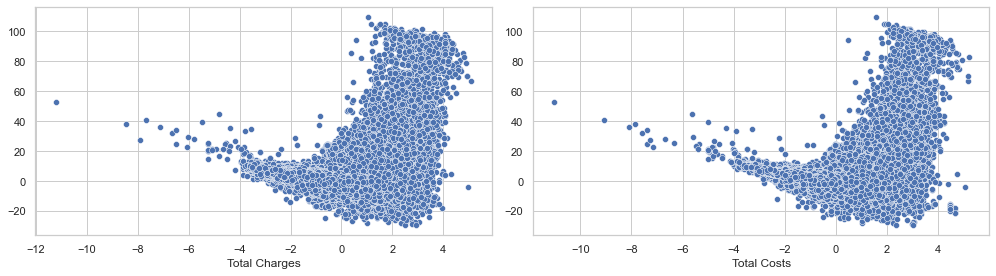

In [67]:
# Visualizing the transformed features
rows = 1
columns = 2
index = 1
plt.figure(figsize=(14,4))
# sns.set(style='darkgrid')
for i in ['Total Charges','Total Costs']:
    plt.subplot(rows,columns,index)
    sns.scatterplot(x=health_data_scaled[i], y=linreg_model.resid )
    index +=1
plt.tight_layout()
plt.show()

**Interpretation:** The above plots show no specific pattern, implies that there is a linearity present in the data.

**2. Autocorrelation**

From the above summary, we can observe that the value obtained from the Durbin-Watson test statistic is close to 2 (= 2.001). Thus, we conclude that there is no autocorrelation.

**3. Heteroscedasticity**

Breusch-Pagan is one of the tests for detecting heteroskedasticity in the residuals.<br>
The test hypothesis for the Breusch-Pagan test is given as:
<p><strong> H<sub>o</sub>:  There is homoscedasticity present in the data </strong> 
<p><strong> H<sub>1</sub>:  There is a heteroscedasticity present in the data </strong> 

In [68]:
test = list(het_breuschpagan(linreg_model.resid, linreg_model.model.exog))
print(f'p_value: {test[3]} ')


p_value: 0.0 


**Interpretation:** We observe that the p-value is less than 0.05 thus, we conclude that there is heteroskedasticity present in the data.

**4. Test of Normality**

<Figure size 864x720 with 0 Axes>

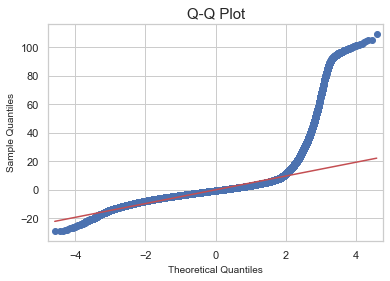

In [69]:

plt.figure(figsize=(12,10))
qqplot(linreg_model.resid, line = 'r')

plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 10)
plt.ylabel('Sample Quantiles', fontsize = 10)

plt.show()

**Interpretation:** The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are away from the diagonal line, we conclude that the residuals do not follow a normal distribution.

<a id=13></a>
### 13. Model Evaluation and Performance

As R2 and Adj R2 are 0.472 anf pvalue of F-statistic is 0.00 which is less than 0.05, the model is significant.

In [70]:
y_train_pred = linreg_model.predict(X_train)
y_test_pred = linreg_model.predict(X_test)

**Mean Squared error**

In [71]:
mse_train = round(mean_squared_error(y_train, y_train_pred),4)

# MSE for the training set
print(f'Mean Squared Error on training set: {mse_train}')
mse_test = round(mean_squared_error(y_test, y_test_pred),4)

#for the test set
print(f'Mean Squared Error on test set: {mse_test}')

Mean Squared Error on training set: 36.5787
Mean Squared Error on test set: 37.0527


**Root Mean Squared Error (RMSE)**

In [72]:
rmse_train = round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4)

# MSE for the training set
print(f'Root Mean Squared Error on training set: {rmse_train}')
rmse_test = round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4)

#for the test set
print(f'Root Mean Squared Error on test set: {rmse_test}')

Root Mean Squared Error on training set: 6.048
Root Mean Squared Error on test set: 6.0871


<a id =14></a>
### 14. Conclusion

We can see the linear regression model with `R2 - 0.468` does not perform really well. 